### Student Information
Name: Jansen Reynaldi Gautama 劉其生

Student ID: 109006240

GitHub ID: GukGuk25

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# 1st

In [1]:
#section 1-2
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)


### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [2]:
# Answer here
ex1 = []
for el in range(3): 
    print("========== data ", el+1 , "==========")
    temp = "\n".join(twenty_train.data[el].split("\n"))
    print(temp)
    ex1.append(temp)   

========== data  1 ==========
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

========== data  2 ==========
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Bac

In [3]:
#section 3
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
#Answer here
df = X
df[df["category_name"] != 'sci.med']

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian


### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [5]:
# Answer here
X[X["category_name"] == "sci.med"].iloc[::10].iloc[:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [6]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan }, #numpy nan == detectable
           { 'id': 'B'}, #litteraly no value so its detected
           { 'id': 'C', 'missing_example': 'NaN'  }, #a string so undetectable
           { 'id': 'D', 'missing_example': 'None' }, #a string so undetectable
           { 'id': 'E', 'missing_example':  None  }, #none == detectable
           { 'id': 'F', 'missing_example': ''     }] #a string

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [9]:
# Answer here
#isnull() can only detect NaN in numeric array, None or NaN in obj array and NaT in datetimelike so we need to replace all of that with None or NaN or simply remove them
NA_df['missing_example'] = NA_df['missing_example'].replace(['NaN', 'None', ''], None)
NA_df['missing_example'].isnull()


0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

#### Answer here
1. the shape of the matrix changes from 2257 x 3 into 1000 x 3
2. the len changes from 2257 into 1000

Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

In [10]:
#section 5.1
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


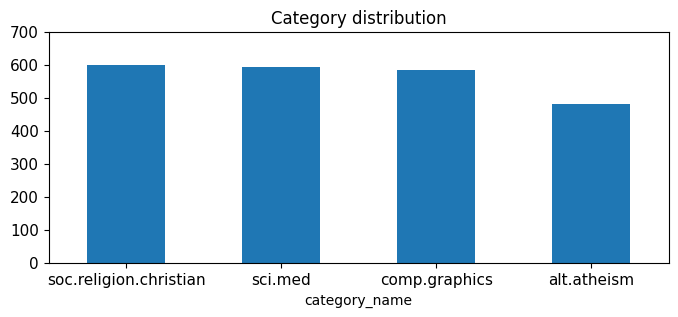

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
print(X_sample.category_name.value_counts())

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

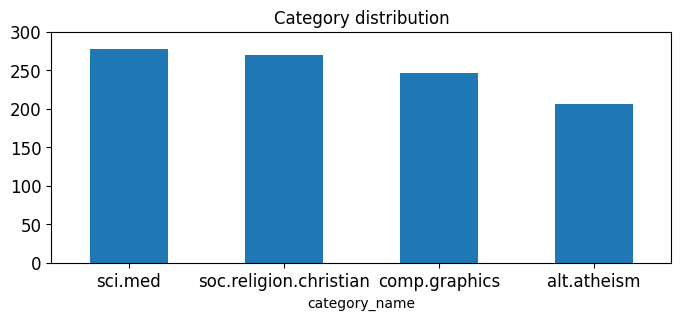

In [12]:
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

277
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

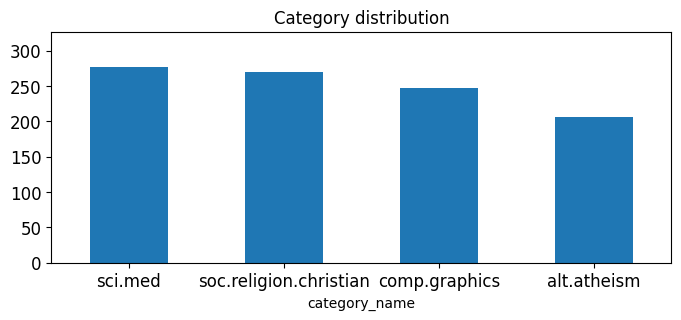

In [13]:
# Answer here

# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

From: djohnson@cs.ucsd.edu (Darin Johnson)
Subject: Re: harrassed at work, could use some prayers
Organization: =CSE Dept., U.C. San Diego
Lines: 63

(Well, I'll email also, but this may apply to other people, so
I'll post also.)

>I've been working at this company for eight years in various
>engineering jobs.  I'm female.  Yesterday I counted and realized that
>on seven different occasions I've been sexually harrassed at this
>company.

>I dreaded coming back to work today.  What if my boss comes in to ask
>me some kind of question...

Your boss should be the person bring these problems to.  If he/she
does not seem to take any action, keep going up higher and higher.
Sexual harrassment does not need to be tolerated, and it can be an
enormous emotional support to discuss this with someone and know that
they are trying to do something about it.  If you feel you can not
discuss this with your boss, perhaps your company has a personnel
department that can work for you while preserving you

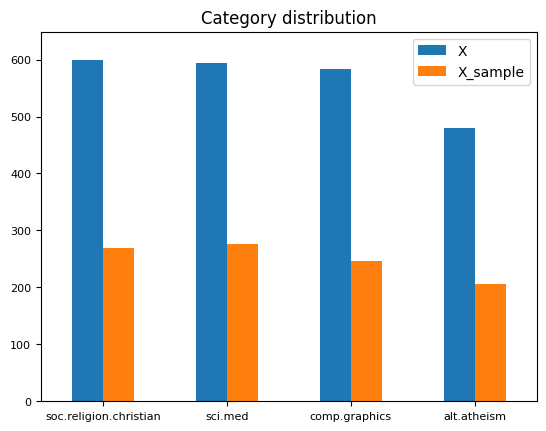

In [14]:
# Answer here
# plot barchart for X_sample
# print(max(X_sample.category_name.value_counts()))
# print(X_sample.category_name.value_counts())

# print(max(X.category_name.value_counts()))
# print(X.category_name.value_counts())

XMax = max(X.category_name.value_counts() + 50)
XsamMax = max(X_sample.category_name.value_counts() + 50)
upper_bound = max(XMax, XsamMax)

# print(upper_bound)
y = X.category_name.value_counts().to_dict()
ys = X_sample.category_name.value_counts().to_dict()

for el in y.keys() :
    y[el] = [y[el], ys[el], ]

df = pd.DataFrame(y).T
df.rename(columns = {0:'X', 1:'X_sample'}, inplace = True)
# print(df)

df.plot(kind = 'bar',
                        title = 'Category distribution',
                        ylim = [0, upper_bound], 
                        rot = 0, fontsize = 8,)

print(temp)

plt.legend()
plt.show()

In [15]:
#section  5.3
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [16]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [17]:
# Answer here
temp = X_counts[4:5, 0:100].toarray()
idxs = 0
for el in temp[0] :
    if el == 1 :
        # print(idxs)
        print(count_vect.get_feature_names_out()[idxs])
    idxs += 1
# print(count_vect.get_feature_names_out()[37])
# print(count_vect.get_feature_names_out()[len([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])-1])

00
01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

Answer Explanation :
so what I've done is to remove all the first "terms" vocab that are doesnt exist in the first "numofdoc" documents. why did i make it like this? its because we dont really need vocab that doesnt exist in the docs its just not relevant so i want to see only the vocab that existed in the choosen docs.
PS : my code is flexible you can just change the "numofdoc" and "terms" variable acording to our needs

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24']
[[0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 

,term_00,term_01,term_013657,term_02,term_03,term_040,term_05,term_071,term_08,term_091139,...,term_12,term_128,term_14,term_15,term_16,term_17,term_18,term_18974,term_19,term_19213
doc_0,0,0,0,0,0,0,0,2,0,0,...,0,0,1,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
doc_6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
doc_7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
doc_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


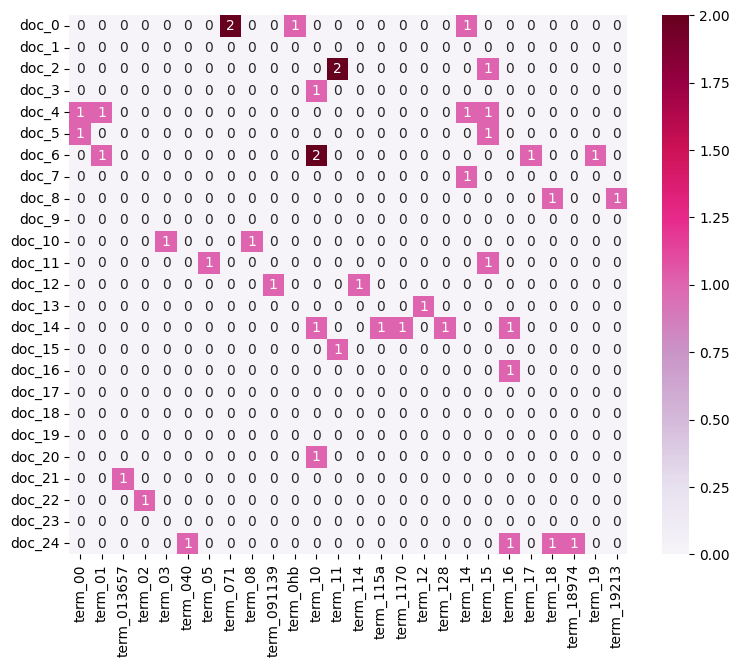

In [18]:
numofdoc = 25
terms = 1000
maxfreq = 0

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:numofdoc]]
print(plot_y)
idxx = []
dictofeature = {}
for el in range(terms) :
    temp = X_counts[0:numofdoc, el].toarray()
    if np.any(temp) :
        maxfreq = max([[x for x in temp].append(maxfreq)])
        idxx.append(el)
plot_z = X_counts[0:numofdoc,[x for x in idxx]].toarray() #X_counts[how many documents, how many terms]
print(plot_z)
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[[x for x in idxx]]]
print(plot_x)

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=maxfreq, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

Answer Explanation :
As we can see in the 3 3d plot below the point are concentrated in few are with some outliers

(2257, 35788)
(2257, 3)


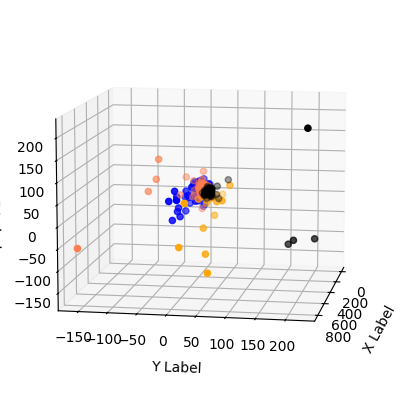

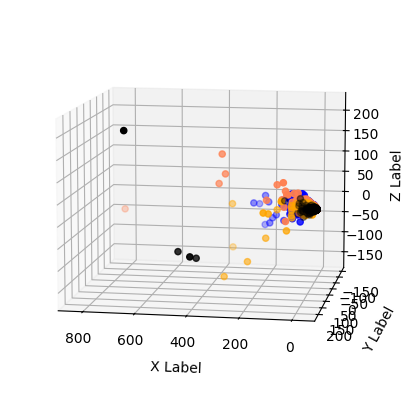

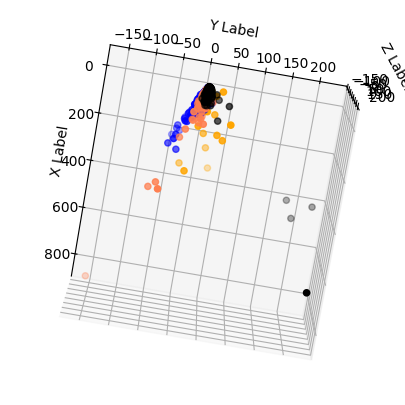

In [19]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)
X_reduced.shape
categories


col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize=(5,5))
fig2 = plt.figure(figsize=(5,5))
fig3 = plt.figure(figsize=(5,5))

ax = fig.add_subplot(projection = '3d')
ax.view_init(elev=10, azim=10, roll=0)

ay = fig2.add_subplot(projection = '3d')
ay.view_init(elev=10, azim=100, roll=0)

az = fig3.add_subplot(projection = '3d')
az.view_init(elev=100, azim=10, roll=0)
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs,  color = c)
    ay.scatter(xs, ys, zs,  color = c)
    az.scatter(xs, ys, zs,  color = c)

# ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ay.set_xlabel('\nX Label')
ay.set_ylabel('\nY Label')
ay.set_zlabel('\nZ Label')

az.set_xlabel('\nX Label')
az.set_ylabel('\nY Label')
az.set_zlabel('\nZ Label')

plt.show()


In [20]:
#section 5.5
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

35788


### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [21]:
# Answer here
import plotly.express as px
x = count_vect.get_feature_names_out()[:300]
y = term_frequencies[:300]
fig = px.bar(x=x,y=y)

fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

Answer Explanation :
i only visualize vocabs that appeared more than once because most of them appeared only once

In [22]:
# Answer here
import plotly.express as px
idxx = []
for el in range(300):
    if term_frequencies[el] >1 :
        idxx.append(el)
print(len(idxx))
print(type(term_frequencies))
x=count_vect.get_feature_names_out()[[x for x in idxx]]
y=term_frequencies[[x for x in idxx]]
fig = px.bar(x=x,y=y)

fig.show()

102
<class 'numpy.ndarray'>


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [23]:
# Answer here
import plotly.express as px
x=count_vect.get_feature_names_out()[:300]
y=term_frequencies[:300]
fig = px.bar(x=x,y=y)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})


fig.show()

In [24]:
#section 5.6
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

Answer Explanation :
for the category and category_name they are connected one to another so, if I created another binarization using the category_name it will resulted the same

In [25]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# 2nd

## 1. Data Preparation

In [26]:
#load data
fh = open("sentiment_labelled_sentences\\amazon_cells_labelled.txt", "r")
fh1 = open("sentiment_labelled_sentences\imdb_labelled.txt", "r")
fh2 = open("sentiment_labelled_sentences\yelp_labelled.txt", "r")

#combine
fhmaster = fh.read() + fh1.read() + fh2.read()

#closehandler
fh.close()
fh1.close()
fh2.close()


#check and remove blanks
print(len(fhmaster.split("\n")))
fhmaster = fhmaster.split("\n")
print(fhmaster[3000])
fhmaster.pop()
print(len(fhmaster))



#split into 2 list for now on foward text is sentence and flag is score XD
text, flag = [], []

for el in fhmaster :
    temp = el.split("\t")
    text.append(temp[0])
    flag.append(temp[1])
print(text)
print(flag)


3001

3000
['So there is no way for me to plug it in here in the US unless I go by a converter.', 'Good case, Excellent value.', 'Great for the jawbone.', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!', 'The mic is great.', 'I have to jiggle the plug to get it to line up right to get decent volume.', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.', 'If you are Razr owner...you must have this!', 'Needless to say, I wasted my money.', 'What a waste of money and time!.', 'And the sound quality is great.', 'He was very impressed when going from the original battery to the extended battery.', 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.', 'Very good quality though', 'The design is very odd, as the ear "clip" is not very comfortable at all.', 'Highly recommend for any one who has a blue tooth phone.', 'I advise EVERYONE DO

## 2. Data Transformation

In [27]:
import pandas as pd
import helpers.data_mining_helpers as dmh


#convert 2 array into 1 pandas df
X = pd.DataFrame(list(zip(text, flag)), columns= ['text','flag'])
X

,text,flag
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


## 3. Data Mining (Dealing with missing value and duplicate data)

In [28]:
#Check is there any missing value

print(X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0)) #check horizontaly
print("============================================================================================")
print(X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)) #check vertically


                                 text                                flag
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0
0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object


In [29]:
#in this data set there are no missing value but just incase there are lets just proccess it although there will be no diffrences
X["text"] = X["text"].replace(['NaN', 'None', ''], None) #in case of bad string
X["flag"] = X["flag"].replace(['NaN', 'None', ''], None) #in case of bad string
X.dropna(inplace=True) #drop blank
print(len(X))

3000


In [30]:
#check duplicate
print(sum(X.duplicated())) #how many duplicate
print("\nLen =", len(X))
print(X[X.duplicated()]) #print duplicate

17

Len = 3000
                                                   text flag
285                                       Great phone!.    1
407                                        Works great.    1
524                                       Works great!.    1
543                             Don't buy this product.    0
744   If you like a loud buzzing to override all you...    0
748                                       Does not fit.    0
778                               This is a great deal.    1
792                                        Great Phone.    1
892                    Excellent product for the price.    1
896                                        Great phone.    1
1363                   Definitely worth checking out.      1
1585                                 Not recommended.      0
1788                                            10/10      1
2814                                 I love this place.    1
2816                             The food was terrible.    0
2843     

In [31]:
X.drop_duplicates(keep='first', inplace=True )#keep first data remove rest of duplicate, and directly modify


In [32]:
print(sum(X.duplicated())) #how many duplicate
print("\nLen =", len(X))
print(X[X.duplicated()]) #print duplicate
print(X)

0

Len = 2983
Empty DataFrame
Columns: [text, flag]
Index: []
                                                   text flag
0     So there is no way for me to plug it in here i...    0
1                           Good case, Excellent value.    1
2                                Great for the jawbone.    1
3     Tied to charger for conversations lasting more...    0
4                                     The mic is great.    1
...                                                 ...  ...
2995  I think food should have flavor and texture an...    0
2996                           Appetite instantly gone.    0
2997  Overall I was not impressed and would not go b...    0
2998  The whole experience was underwhelming, and I ...    0
2999  Then, as if I hadn't wasted enough of my life ...    0

[2983 rows x 2 columns]


## 4. Data Preprocessing

In [33]:
#do some sampling
print(X.shape)
X_sample = X.sample(n=1000,random_state=42)
display(X_sample)

(2983, 2)


,text,flag
2423,We've tried to like this place but after 10+ t...,0
1558,The script is a big flawed mess.,0
889,It was that loud.Glad to say that the Plantron...,1
332,The reception is excellent!,1
1850,Now imagine that every single one of those dec...,0
...,...,...
926,It looses connection to the phone even when it...,0
1221,There are the usual Hitchcock logic flaws.,0
2724,Awesome selection of beer.,1
2470,"Very good, though!",1


In [34]:
#check the ratio between 1 and 0 flag
X.flag.value_counts()
X_sample.flag.value_counts()

flag
0    506
1    494
Name: count, dtype: int64

<Axes: title={'center': 'flag distribution of X'}, xlabel='flag'>

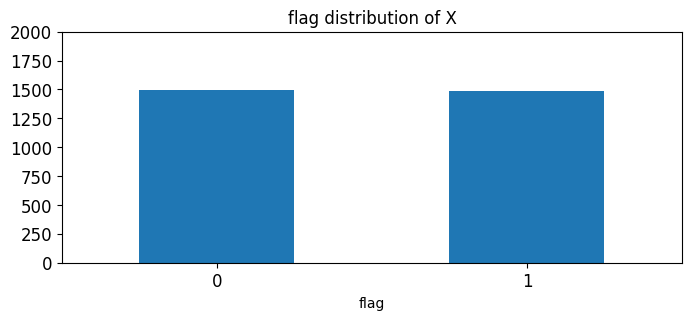

In [35]:
X.flag.value_counts().plot(kind = 'bar',
                                           title = 'flag distribution of X',
                                           ylim = [0, 2000], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'flag distribution of X_sample'}, xlabel='flag'>

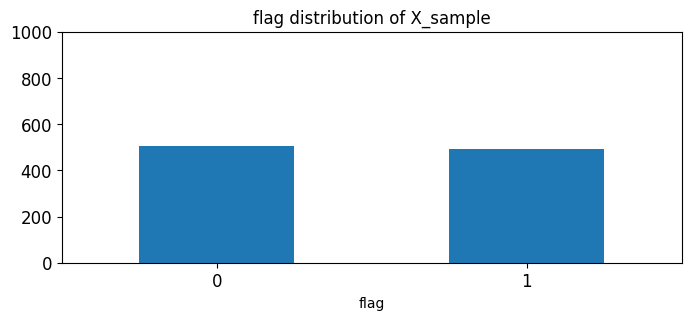

In [36]:
X_sample.flag.value_counts().plot(kind = 'bar',
                                           title = 'flag distribution of X_sample',
                                           ylim = [0, 1000], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [37]:
#Feature Creation
import nltk
nltk.download('punkt')
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jansen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
X

,text,flag,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"
...,...,...,...
2995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te..."
2996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]"
2997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ..."
2998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,..."


In [39]:
#Feature subset selection/extraction using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() #vectorize
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2983, 5159)
  (0, 4165)	1
  (0, 4549)	1
  (0, 2428)	1
  (0, 3045)	1
  (0, 4991)	1
  (0, 1830)	1
  (0, 2811)	1
  (0, 4613)	1
  (0, 3389)	1
  (0, 2434)	1
  (0, 2315)	2
  (0, 2159)	1
  (0, 4535)	1
  (0, 4839)	1
  (0, 4797)	1
  (0, 1983)	1
  (0, 648)	1
  (0, 1014)	1


In [40]:
#create analyzer then make new segment in X
analyze = count_vect.build_analyzer()
X['analyzed'] = X['text'].apply(lambda x: analyze(x))
print(X_counts.shape)
X

(2983, 5159)


,text,flag,unigrams,analyzed
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...","[so, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]","[good, case, excellent, value]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]","[great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...","[tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]","[the, mic, is, great]"
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...","[think, food, should, have, flavor, and, textu..."
2996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]","[appetite, instantly, gone]"
2997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...","[overall, was, not, impressed, and, would, not..."
2998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,...","[the, whole, experience, was, underwhelming, a..."


In [41]:
vector_feature = count_vect.get_feature_names_out()

In [42]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
print(plot_y)
plot_z = X_counts[0:100,0:100].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980', 'term_1986', 'term_1995', 'term_1998', 'term_20', 'term_2000', 'term_2005', 'term_2006', 'term_2007', 'term_20th', 'term_2160', 'term_23', 'term_24', 'term_25', 'term_2mp', 'term_30', 'term_30s', 'term_325', 'term_35', 'term_350', 'term_375', 'term_3o', 'term_40', 'term_40min', 'term_42', 'term_44', 'term_45', 'term_4s', 'term_4ths', 'term_50', 'term_5020', 'term_510', 'term_5320', 'term_54', 'term_5lb', 'term_680', 'term_70', 'term_70000', 'term_700w', 'term_70s', 'term_80', 'term_80s', 'term_8125', 'term_85', 'term_8525', 'term_8530', 'term_8pm', 'term_90', 'term_95', 'term_99', 'term_aailiyah', 'term_abandoned', 'term_abhor', 'term_ability', 'term_able', 'term_abound', 'term_about', 'term_above', 'term_abroad', 'term_absolute', 'term_absolutel'

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,...,term_accessable,term_accessible,term_accessing,term_accessory,term_accessoryone,term_accident,term_accidentally,term_acclaimed,term_accolades,term_accommodations
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


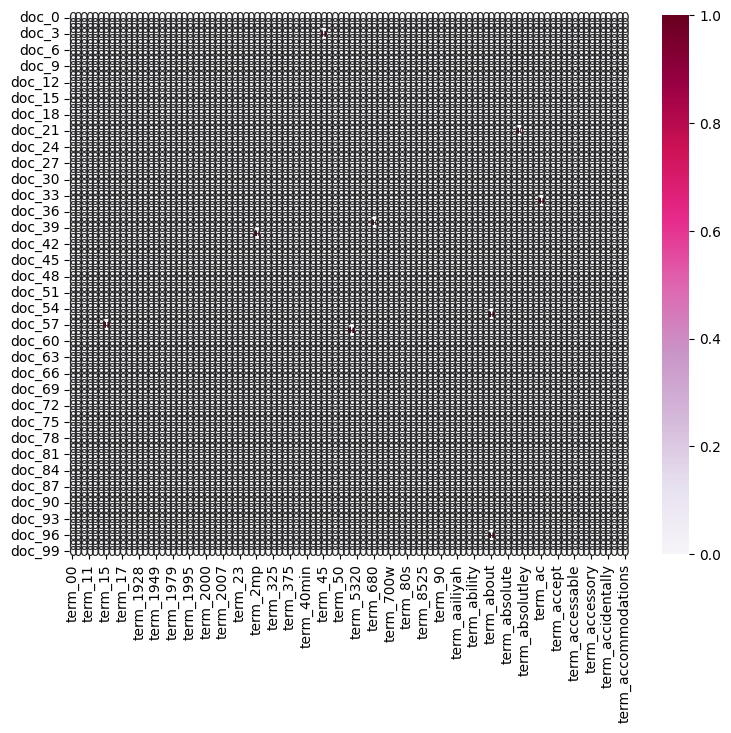

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

,term_45,term_absolutely,term_advise,term_again,term_all,term_and,term_any,term_are,term_as,term_at,...,term_but,term_by,term_case,term_charger,term_charging,term_clicks,term_clip,term_comfortable,term_commercials,term_contacts
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
doc_7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


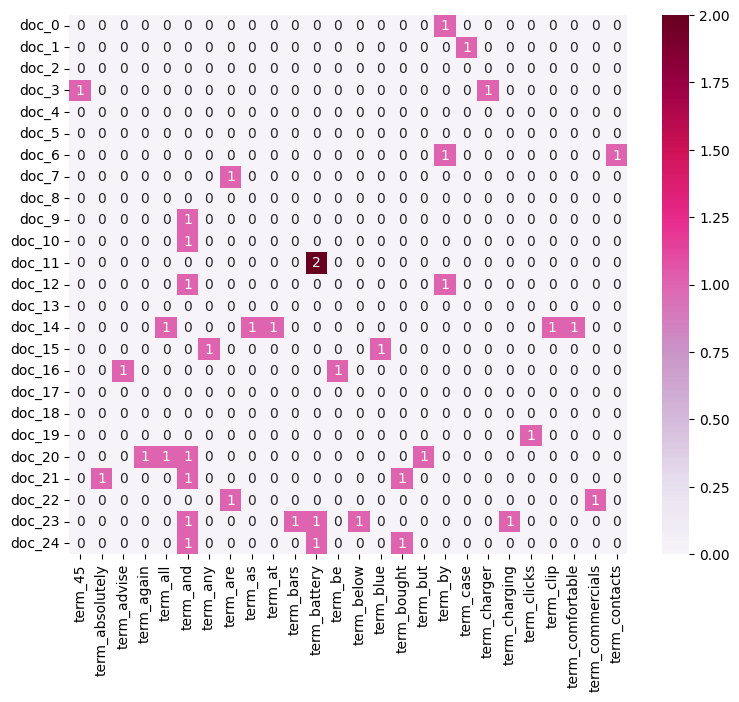

In [44]:
#printing the first terms that existed in first 25 data
numofdoc = 25
terms = 1000
maxfreq = 0

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:numofdoc]]
print(plot_y)
idxx = []
dictofeature = {}
for el in range(terms) :
    temp = X_counts[0:numofdoc, el].toarray()
    if np.any(temp) :
        maxfreq = max([[x for x in temp].append(maxfreq)])
        idxx.append(el)
plot_z = X_counts[0:numofdoc,[x for x in idxx]].toarray() #X_counts[how many documents, how many terms]
print(plot_z)
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[[x for x in idxx]]]
print(plot_x)

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=maxfreq, annot=True)

In [45]:
#dimensional reduction
from sklearn.decomposition import PCA
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2983, 5159)
(2983, 2)


Text(0, 0.5, '\nY Label')

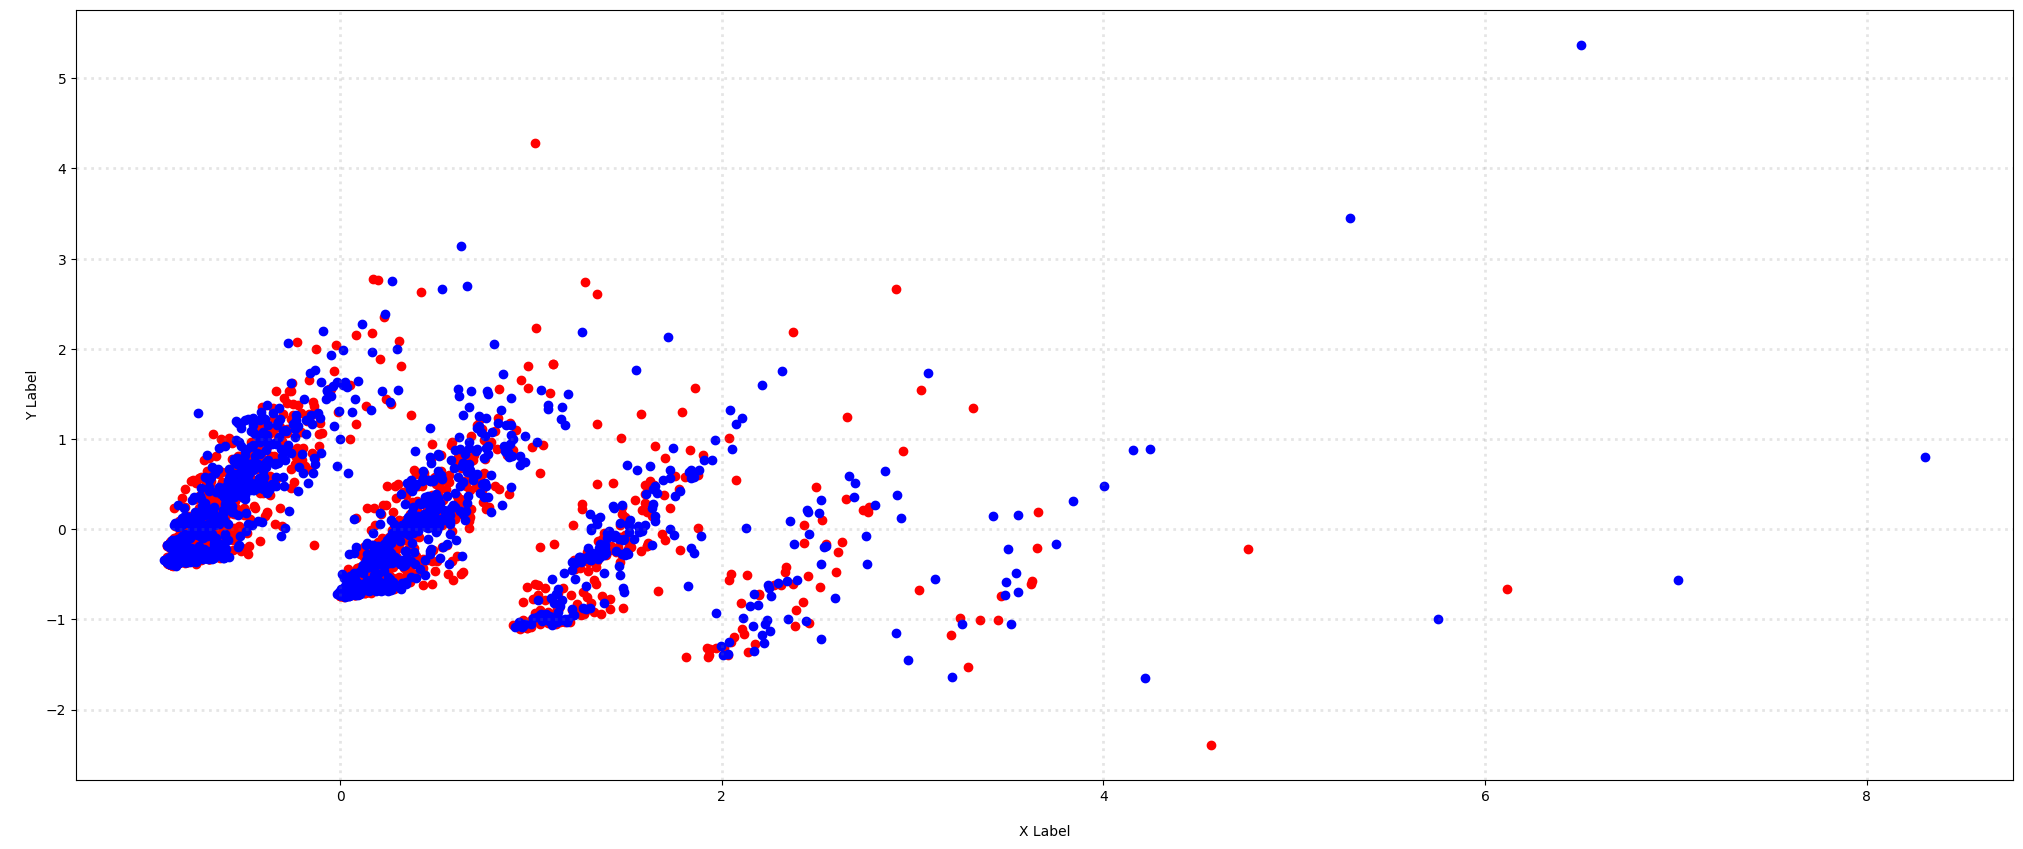

In [46]:
#plot the reduced dimension into 2d
col = ['red', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, fl in zip(col, flag):
    xs = X_reduced[X['flag'] == fl].T[0]
    ys = X_reduced[X['flag'] == fl].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

(2983, 5159)
(2983, 3)


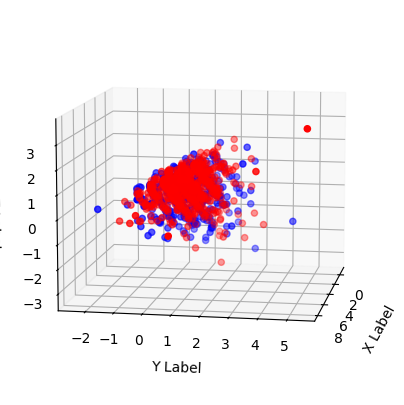

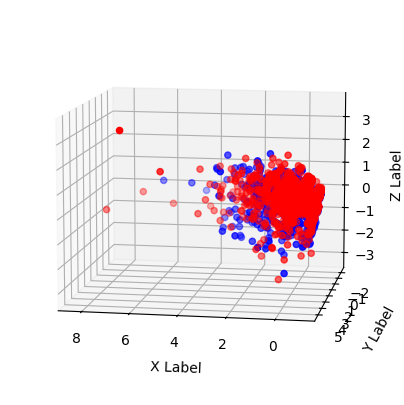

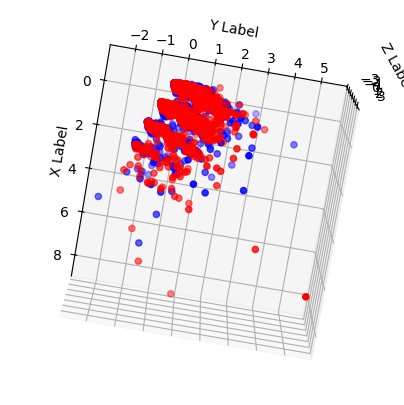

In [47]:
#plot the reduced dimension into 3 3d
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)
X_reduced.shape


col = ['blue', 'red']

# plot
fig = plt.figure(figsize=(5,5))
fig2 = plt.figure(figsize=(5,5))
fig3 = plt.figure(figsize=(5,5))

ax = fig.add_subplot(projection = '3d')
ax.view_init(elev=10, azim=10, roll=0)

ay = fig2.add_subplot(projection = '3d')
ay.view_init(elev=10, azim=100, roll=0)

az = fig3.add_subplot(projection = '3d')
az.view_init(elev=100, azim=10, roll=0)
for c, fl in zip(col, flag):
    xs = X_reduced[X['flag'] == fl].T[0]
    ys = X_reduced[X['flag'] == fl].T[1]
    zs = X_reduced[X['flag'] == fl].T[2]

    ax.scatter(xs, ys, zs,  color = c)
    ay.scatter(xs, ys, zs,  color = c)
    az.scatter(xs, ys, zs,  color = c)

# ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ay.set_xlabel('\nX Label')
ay.set_ylabel('\nY Label')
ay.set_zlabel('\nZ Label')

az.set_xlabel('\nX Label')
az.set_ylabel('\nY Label')
az.set_zlabel('\nZ Label')

plt.show()

In [48]:
#aggregation
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [49]:
#visualize using plotly (first 300 token)
import plotly.express as px
x = count_vect.get_feature_names_out()[:300]
y = term_frequencies[:300]
fig = px.bar(x=x,y=y)

fig.show()

In [50]:
#plot them in order of the frequency (first 300 token)
import plotly.express as px
x=count_vect.get_feature_names_out()[:300]
y=term_frequencies[:300]
fig = px.bar(x=x,y=y)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})


fig.show()

C:\Users\Jansen\AppData\Local\Temp\ipykernel_48620\1288557628.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


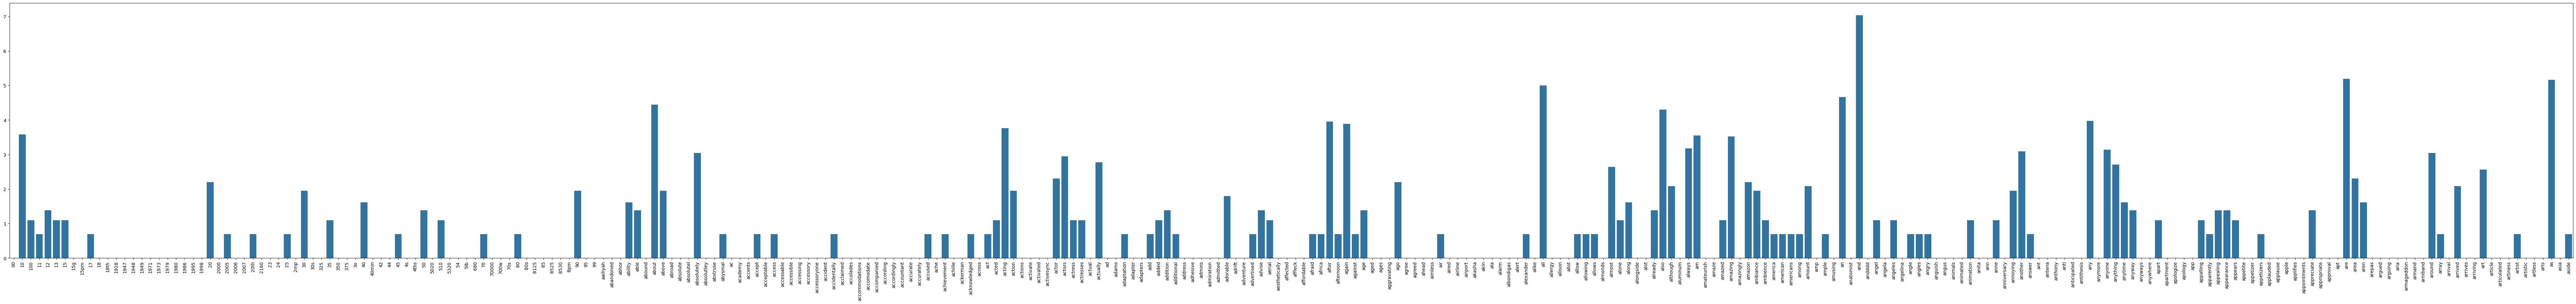

In [51]:
#transform into log distribution (first 300 token)
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


In [52]:
#Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.flag)
X['bin_flag'] = mlb.transform(X['flag']).tolist()

In [53]:
X

,text,flag,unigrams,analyzed,bin_flag
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...","[so, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]","[good, case, excellent, value]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]","[great, for, the, jawbone]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...","[tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]","[the, mic, is, great]",[1]
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...","[think, food, should, have, flavor, and, textu...",[0]
2996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]","[appetite, instantly, gone]",[0]
2997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...","[overall, was, not, impressed, and, would, not...",[0]
2998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,...","[the, whole, experience, was, underwhelming, a...",[0]


## Data Explorazation


In [54]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [55]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Jansen\AppData\Local\Temp\ipykernel_48620\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Jansen\AppData\Local\Temp\ipykernel_48620\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Jansen\AppData\Local\Temp\ipykernel_48620\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Jansen\AppData\Local\Temp\ipykernel_48620\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 t

In [56]:
print(X['text'][50])
print(X['text'][100])
print(X['text'][150])

Not loud enough and doesn't turn on like it should.
Integrated seamlessly with the Motorola RAZR phone.
I Was Hoping for More.


# 3rd
- Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
- Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

## New Data Visualization

<Axes: title={'center': 'flag distribution of X'}, xlabel='flag'>

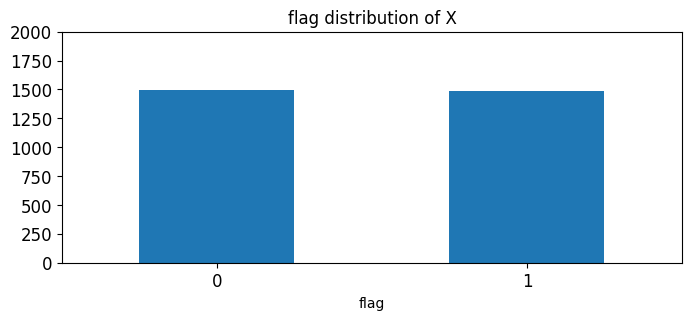

In [57]:
#the differences are so small so we cant really see the differences so we need new way to visualize it
X.flag.value_counts().plot(kind = 'bar',
                                           title = 'flag distribution of X',
                                           ylim = [0, 2000], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'flag distribution of X'}, ylabel='count'>

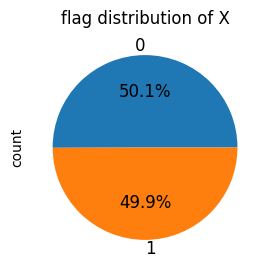

In [58]:
#and i choose pie chart because we can see the difference better in pie chart rather than in bar chart
X.flag.value_counts().plot(kind = 'pie',
                                           title = 'flag distribution of X', 
                                           rot = 0, fontsize = 12, figsize = (8,3),
                                           autopct = '%1.1f%%')

## TF-IDF features

In [59]:
#Feature subset selection/extraction using TdifVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


tfid_vect = TfidfVectorizer() #vectorize
X_counts_tfid = tfid_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts_tfid.shape)
print(X_counts_tfid[0])
X

(2983, 5159)
  (0, 1014)	0.39845191493787
  (0, 648)	0.22336356134689328
  (0, 1983)	0.23148898512916666
  (0, 4797)	0.33196418005888045
  (0, 4839)	0.27543498748014605
  (0, 4535)	0.08660911076870992
  (0, 2159)	0.2227447042096017
  (0, 2315)	0.29538473002682736
  (0, 2434)	0.11967341692510161
  (0, 3389)	0.30867885491964087
  (0, 4613)	0.12743843831122717
  (0, 2811)	0.22862480508531938
  (0, 1830)	0.15641093659829974
  (0, 4991)	0.24912534604580203
  (0, 3045)	0.22336356134689328
  (0, 2428)	0.12076100916837491
  (0, 4549)	0.20758334753371457
  (0, 4165)	0.18739563776922355


,text,flag,unigrams,analyzed,bin_flag
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...","[so, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]","[good, case, excellent, value]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]","[great, for, the, jawbone]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...","[tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]","[the, mic, is, great]",[1]
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...","[think, food, should, have, flavor, and, textu...",[0]
2996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]","[appetite, instantly, gone]",[0]
2997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...","[overall, was, not, impressed, and, would, not...",[0]
2998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,...","[the, whole, experience, was, underwhelming, a...",[0]


In [60]:
#build tfid analyzer
tfid_analyze = tfid_vect.build_analyzer()
X['tfid_analyze'] = X['text'].apply(lambda x: tfid_analyze(x))
print(X_counts_tfid.shape)
X

(2983, 5159)


,text,flag,unigrams,analyzed,bin_flag,tfid_analyze
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...","[so, there, is, no, way, for, me, to, plug, it...",[0],"[so, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]","[good, case, excellent, value]",[1],"[good, case, excellent, value]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]","[great, for, the, jawbone]",[1],"[great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...","[tied, to, charger, for, conversations, lastin...",[0],"[tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]","[the, mic, is, great]",[1],"[the, mic, is, great]"
...,...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...","[think, food, should, have, flavor, and, textu...",[0],"[think, food, should, have, flavor, and, textu..."
2996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]","[appetite, instantly, gone]",[0],"[appetite, instantly, gone]"
2997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...","[overall, was, not, impressed, and, would, not...",[0],"[overall, was, not, impressed, and, would, not..."
2998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,...","[the, whole, experience, was, underwhelming, a...",[0],"[the, whole, experience, was, underwhelming, a..."


In [61]:
tfid_feature = [i for i in tfid_vect.get_feature_names_out()]


In [62]:
tfid_feature


['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

In [63]:
print(X_counts_tfid)
print("=============")
print(X_counts)
print("=============")
print("=============")
print(tfid_feature)
print("=============")
print(vector_feature)

print(tfid_feature==vector_feature)
if False in (tfid_feature==vector_feature) :
    print("hello")
else :
    print("hi")

  (0, 1014)	0.39845191493787
  (0, 648)	0.22336356134689328
  (0, 1983)	0.23148898512916666
  (0, 4797)	0.33196418005888045
  (0, 4839)	0.27543498748014605
  (0, 4535)	0.08660911076870992
  (0, 2159)	0.2227447042096017
  (0, 2315)	0.29538473002682736
  (0, 2434)	0.11967341692510161
  (0, 3389)	0.30867885491964087
  (0, 4613)	0.12743843831122717
  (0, 2811)	0.22862480508531938
  (0, 1830)	0.15641093659829974
  (0, 4991)	0.24912534604580203
  (0, 3045)	0.22336356134689328
  (0, 2428)	0.12076100916837491
  (0, 4549)	0.20758334753371457
  (0, 4165)	0.18739563776922355
  (1, 4865)	0.633627682893175
  (1, 1604)	0.47208678028809276
  (1, 714)	0.512627326445873
  (1, 1994)	0.3359512695758188
  (2, 2451)	0.8223576509783525
  (2, 2024)	0.40205777854454006
  (2, 4535)	0.1950221671536334
  :	:
  (2982, 1388)	0.29330938809811624
  (2982, 5114)	0.29330938809811624
  (2982, 3439)	0.29330938809811624
  (2982, 3860)	0.26883783193000615
  (2982, 2069)	0.27899444540548035
  (2982, 589)	0.2443662757618960

## Naive Bayes

In [64]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

bayes_classifier = MultinomialNB() #defind classifier
train_text, test_text, train_flag, text_flag = train_test_split(X['text'], X['flag'], test_size=0.2, random_state=1) #i found that in this data set random state 1 give better result than some that i tested (around 15 state)

In [65]:
bayes_classifier.fit(count_vect.fit_transform(train_text), train_flag) #training
temp = bayes_classifier.predict(count_vect.transform(test_text)) #predict

temp2 = text_flag

# print(temp)
print(metrics.accuracy_score(temp2, temp)) #scoring
print(metrics.classification_report(temp2, temp,
                                            target_names=['Positive', 'Negative']))

0.830820770519263
              precision    recall  f1-score   support

    Positive       0.83      0.83      0.83       298
    Negative       0.83      0.83      0.83       299

    accuracy                           0.83       597
   macro avg       0.83      0.83      0.83       597
weighted avg       0.83      0.83      0.83       597



In [66]:
#just like previous cell
bayes_classifier.fit(tfid_vect.fit_transform(train_text), train_flag)
temp = bayes_classifier.predict(tfid_vect.transform(test_text))

temp2 = text_flag

# print(temp)
print(metrics.accuracy_score(temp2, temp))
print(metrics.classification_report(temp2, temp,
                                            target_names=['Positive', 'Negative']))
    

0.8257956448911222
              precision    recall  f1-score   support

    Positive       0.82      0.83      0.83       298
    Negative       0.83      0.82      0.83       299

    accuracy                           0.83       597
   macro avg       0.83      0.83      0.83       597
weighted avg       0.83      0.83      0.83       597



## Inefficient Part

Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

1. I dont think in 5.6 Discretization and Binarization is meaning full for every dataset, because in the lab and hw we dont realy need to create it because it is not being used
2. There are alot of plotting in the lab which for me is not meaning full to plot a dataset with multiple plot, we can just choose one method that suitable with out dataset
3. i found that in we calculate some identical stuff multiple time such as plot_x plot_y plot_z, what we can do is calculate it one then we can just get the subset from them rather than calculating it multiple time
4. I don't think creating unigram is necesarry